图片的显示与读写操作
===

# 1.灰度化-Grayscale
将图像灰度化吧！灰度是一种图像亮度的表示方法，通过下式计算：
$$Y = 0.2126R + 0.7152G + 0.0722B$$

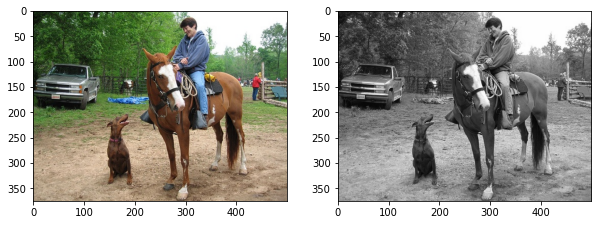

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read image
img = cv2.imread("data/02.jpg")
b = img[:, :, 0].copy()
g = img[:, :, 1].copy()
r = img[:, :, 2].copy()

# Gray scale
out = 0.2126 * r + 0.7152 * g + 0.0722 * b
out = out.astype(np.uint8)

plt.figure(figsize=(10,5), facecolor='w')
plt.subplot(1, 2, 1)
show_img1 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(show_img1)

plt.subplot(1, 2, 2)
show_img2 = cv2.cvtColor(out, cv2.COLOR_BGR2RGB)
plt.imshow(show_img2)

# 2.二值化
二值化是将图像使用黑和白两种值表示的方法，我们将灰度的阈值设置为 128 来进行二值化

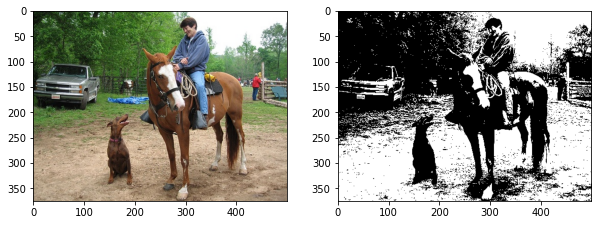

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read image
img = cv2.imread("data/02.jpg")
b = img[:, :, 0].copy()
g = img[:, :, 1].copy()
r = img[:, :, 2].copy()

# Gray scale
out = 0.2126 * r + 0.7152 * g + 0.0722 * b
out = out.astype(np.uint8)
th = 128
out[out < th] = 0
out[out >= th] = 255

plt.figure(figsize=(10,5), facecolor='w')
plt.subplot(1, 2, 1)
show_img1 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(show_img1)

plt.subplot(1, 2, 2)
show_img2 = cv2.cvtColor(out, cv2.COLOR_BGR2RGB)
plt.imshow(show_img2)

# 3.二值化-大津算法(Otsu's Method)
大津二值化算法与普通二值化算法的区别就是大津算法可以自动确定二值化中的阈值，而普通二值化算法的阈值就是128

- 小于阈值t的类记作0，大于阈值t的类记作1；
- w0和w1是被阈值t分开的两个类中的像素数占总像素数的比率（满足 w0+w1=1）；
- $S0^2$,$S1^2$是这两个类中像素值的方差；
- M0, M1 是这两个类的像素值的平均值；

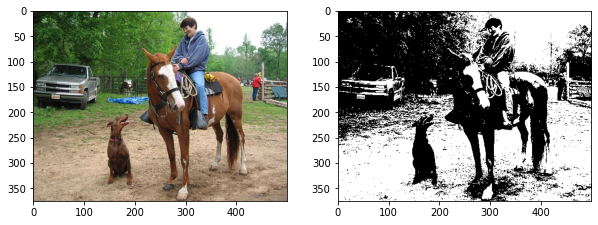

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read image
img = cv2.imread("data/02.jpg")
b = img[:, :, 0].copy()
g = img[:, :, 1].copy()
r = img[:, :, 2].copy()
H, W, C = img.shape
# Gray scale
out = 0.2126 * r + 0.7152 * g + 0.0722 * b
out = out.astype(np.uint8)

max_sigma = 0
max_t = 0

for _t in range(1, 255):
    v0 = out[np.where(out < _t)]
    m0 = np.mean(v0) if len(v0) > 0 else 0.
    w0 = len(v0) / (H * W)
    v1 = out[np.where(out >= _t)]
    m1 = np.mean(v1) if len(v1) > 0 else 0.
    w1 = len(v1) / (H * W)
    sigma = w0 * w1 * ((m0 - m1) ** 2)
    if sigma > max_sigma:
        max_sigma = sigma
        max_t = _t

th = max_t
out[out < th] = 0
out[out >= th] = 255

plt.figure(figsize=(10,5), facecolor='w')
plt.subplot(1, 2, 1)
show_img1 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(show_img1)

plt.subplot(1, 2, 2)
show_img2 = cv2.cvtColor(out, cv2.COLOR_BGR2RGB)
plt.imshow(show_img2)

# 4.HSV转换
HSV使用色相Hue、饱和度Saturation、明度Value来表示色彩的一种方式。

## 4.1.色相
将颜色使用0到360度表示，就是平常所说的颜色名称，如红色、蓝色。色相与数值按下表对应

| 红 | 黄 | 绿 | 青 | 蓝 | 品红 |
| -- | -- | -- | -- | -- | -- |
| 0 | 60 | 120 | 180 | 240 | 300 |

## 4.2.饱和度
指色彩的纯度，饱和度越低则颜色越黯淡($0 \leq S < 1$)

## 4.3.明度
颜色的明暗程度。数值越高越接近白色，数值越低越接近黑色($0 \leq V < 1$)